<a href="https://colab.research.google.com/github/Jahanvi-2004/Disk-Scheduling-Algorithm-Simulator/blob/main/AI_Generated_Music_Market_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>1. Setup & Install Dependencies</b>

In [ ]:
!pip install matplotlib seaborn scikit-learn pandas ipywidgets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report
import numpy as np
import ipywidgets as widgets
from IPython.display import display

<b> 2. Load and Preprocess Data</b>

In [ ]:
# Upload your Spotify dataset (CSV format).
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

spotify_df = pd.read_csv(filename)
spotify_df.dropna(inplace=True)

# Normalize features
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'speechiness']
scaler = StandardScaler()
X = scaler.fit_transform(spotify_df[features])

# Encode genres
le = LabelEncoder()
spotify_df['genre_encoded'] = le.fit_transform(spotify_df['playlist_genre'])

Saving low_popularity_spotify_data.csv to low_popularity_spotify_data.csv
Saving high_popularity_spotify_data.csv to high_popularity_spotify_data.csv


<b>3. Clustering with KMeans</b>

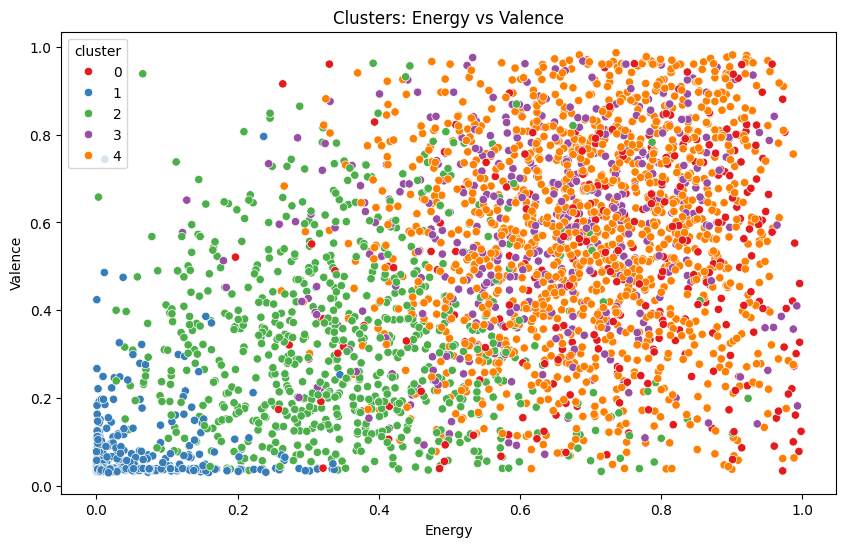

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
spotify_df['cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(10,6))
sns.scatterplot(x=spotify_df['energy'], y=spotify_df['valence'], hue=spotify_df['cluster'], palette="Set1")
plt.title("Clusters: Energy vs Valence")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.show()

<b>4. Predict Popularity (Regression)</b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, spotify_df['track_popularity'], test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
preds = rf.predict(X_test)
print("MSE:", mean_squared_error(y_test, preds))


MSE: 199.38804075914152


<b> 5. Genre Classification</b>

In [ ]:
from sklearn.metrics import classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, spotify_df['genre_encoded'], test_size=0.2, random_state=42)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and decode genre names
preds = clf.predict(X_test)
y_test_labels = le.inverse_transform(y_test)
preds_labels = le.inverse_transform(preds)

# Generate classification report
print(classification_report(y_test_labels, preds_labels))



              precision    recall  f1-score   support

   afrobeats       0.57      0.27      0.36        15
     ambient       0.23      0.28      0.25        53
      arabic       0.00      0.00      0.00        22
       blues       0.00      0.00      0.00         7
   brazilian       0.24      0.24      0.24        33
    cantopop       0.00      0.00      0.00         3
   classical       0.24      0.30      0.27        20
     country       0.00      0.00      0.00         1
  electronic       0.33      0.55      0.41        85
        folk       1.00      0.17      0.29         6
        funk       1.00      0.20      0.33         5
      gaming       1.00      0.11      0.20         9
      gospel       0.00      0.00      0.00         7
     hip-hop       0.28      0.47      0.35        30
      indian       1.00      0.09      0.17        11
       indie       0.00      0.00      0.00         1
       j-pop       0.00      0.00      0.00         6
        jazz       0.50    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**6. Listener Behavior Simulation**

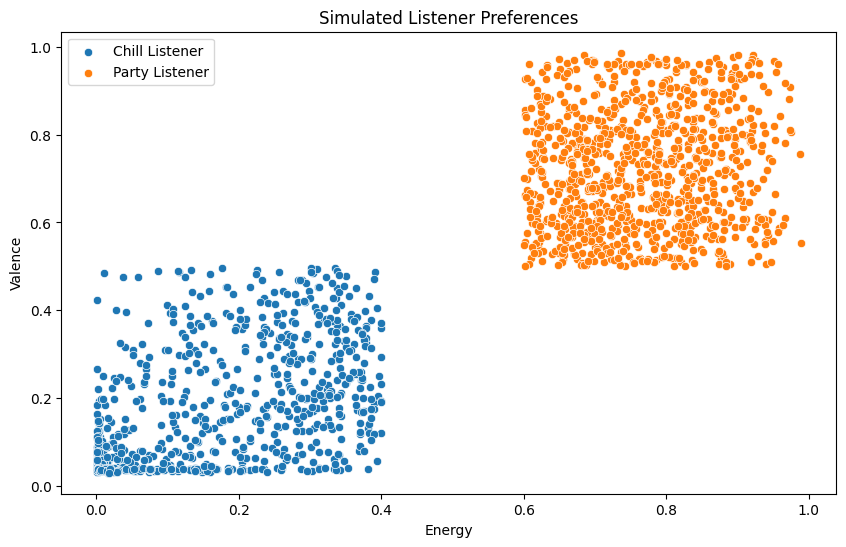

In [ ]:
listeners = {
    'Chill Listener': {'energy': (0.0, 0.4), 'valence': (0.0, 0.5)},
    'Party Listener': {'energy': (0.6, 1.0), 'valence': (0.5, 1.0)},
}

plt.figure(figsize=(10, 6))
for label, prefs in listeners.items():
    mask = (
        (spotify_df['energy'] >= prefs['energy'][0]) &
        (spotify_df['energy'] <= prefs['energy'][1]) &
        (spotify_df['valence'] >= prefs['valence'][0]) &
        (spotify_df['valence'] <= prefs['valence'][1])
    )
    subset = spotify_df[mask]
    sns.scatterplot(data=subset, x='energy', y='valence', label=label)

plt.title("Simulated Listener Preferences")
plt.xlabel("Energy")
plt.ylabel("Valence")
plt.legend()
plt.show()

**6. Listener Behavior Simulation**

In [ ]:
params = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
gs = GridSearchCV(RandomForestRegressor(random_state=42), params, cv=3, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)
print("Best Params:", gs.best_params_)
print("Best Score:", -gs.best_score_)

Best Params: {'max_depth': None, 'n_estimators': 100}
Best Score: 88.8800718281601


**8. Save Results**

In [ ]:
# Save cluster assignments and predictions
spotify_df['predicted_popularity'] = rf.predict(X)
spotify_df.to_csv("spotify_ml_results.csv", index=False)
print("Results saved as spotify_ml_results.csv")

Results saved as spotify_ml_results.csv


**9. Interactive Simulation Interface**

In [ ]:
energy_slider = widgets.FloatRangeSlider(value=[0.3, 0.7], min=0.0, max=1.0, step=0.01, description='Energy:')
valence_slider = widgets.FloatRangeSlider(value=[0.3, 0.7], min=0.0, max=1.0, step=0.01, description='Valence:')

@widgets.interact(energy=energy_slider, valence=valence_slider)
def interactive_simulation(energy, valence):
    mask = (
        (spotify_df['energy'] >= energy[0]) & (spotify_df['energy'] <= energy[1]) &
        (spotify_df['valence'] >= valence[0]) & (spotify_df['valence'] <= valence[1])
    )
    sample = spotify_df[mask]
    plt.figure(figsize=(10, 5))
    sns.histplot(sample['track_popularity'], bins=20, kde=True)
    plt.title("Popularity Distribution for Selected Preferences")
    plt.xlabel("Track Popularity")
    plt.ylabel("Count")
    plt.show()


interactive(children=(FloatRangeSlider(value=(0.3, 0.7), description='Energy:', max=1.0, step=0.01), FloatRang…